In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('marks.csv',header=None, names=['name','subject','marks'])

In [2]:
df

NameError: name 'df' is not defined

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   name     10 non-null     object 
 1   subject  9 non-null      object 
 2   marks    9 non-null      float64
dtypes: float64(1), object(2)
memory usage: 368.0+ bytes


In [16]:
df.columns

Index(['name', 'subject', 'marks'], dtype='object')

In [17]:
df.marks.mean()
df['marks'].mean()  # Series 

81.88888888888889

In [18]:
df['subject'].value_counts()

Python    4
Java      3
C         1
HTML      1
Name: subject, dtype: int64

In [19]:
df.size

30

In [20]:
df.shape

(10, 3)

In [21]:
df.values

array([['Bill', 'Java', 90.0],
       ['Bill', 'Python', 95.0],
       ['Steve', 'Java', 80.0],
       ['Steve', 'C', 90.0],
       ['Roberts', 'HTML', 98.0],
       ['Roberts', 'Java', 60.0],
       ['Roberts', 'Python', 70.0],
       ['Steve', 'Python', nan],
       ['Henry', nan, 60.0],
       ['Steve', 'Python', 94.0]], dtype=object)

In [22]:
df.describe()

,marks
count,9.000000
mean,81.888889
std,15.053608
min,60.000000
25%,70.000000
50%,90.000000
75%,94.000000
max,98.000000


In [23]:
df.describe(include='all')    # Include all columns 

,name,subject,marks
count,10,9,9.000000
unique,4,4,NaN
top,Steve,Python,NaN
freq,4,4,NaN
mean,NaN,NaN,81.888889
std,NaN,NaN,15.053608
min,NaN,NaN,60.000000
25%,NaN,NaN,70.000000
50%,NaN,NaN,90.000000
75%,NaN,NaN,94.000000


In [24]:
df.axes

[RangeIndex(start=0, stop=10, step=1),
 Index(['name', 'subject', 'marks'], dtype='object')]

## Retrieving data 

In [25]:
df.subject   # dj['subject']

0      Java
1    Python
2      Java
3         C
4      HTML
5      Java
6    Python
7    Python
8       NaN
9    Python
Name: subject, dtype: object

In [26]:
df[['name','marks']]

,name,marks
0,Bill,90.0
1,Bill,95.0
2,Steve,80.0
3,Steve,90.0
4,Roberts,98.0
5,Roberts,60.0
6,Roberts,70.0
7,Steve,NaN
8,Henry,60.0
9,Steve,94.0


### at and iat attributes 

In [27]:
df.at[0,'marks'], df.iat[0,2]

(90.0, 90.0)

In [28]:
df[df.marks > 80]

,name,subject,marks
0,Bill,Java,90.0
1,Bill,Python,95.0
3,Steve,C,90.0
4,Roberts,HTML,98.0
9,Steve,Python,94.0


In [29]:
df[df.marks > 80][['name','marks']]

,name,marks
0,Bill,90.0
1,Bill,95.0
3,Steve,90.0
4,Roberts,98.0
9,Steve,94.0


In [30]:
df.loc[df.marks > 80, ['name','marks']]

,name,marks
0,Bill,90.0
1,Bill,95.0
3,Steve,90.0
4,Roberts,98.0
9,Steve,94.0


In [31]:
df[(df.subject == 'Python') & (df.marks > 80)]   # & is logical And, Paranetheses must

,name,subject,marks
1,Bill,Python,95.0
9,Steve,Python,94.0


In [32]:
df.subject.isin(['Python','Java'])

0     True
1     True
2     True
3    False
4    False
5     True
6     True
7     True
8    False
9     True
Name: subject, dtype: bool

In [33]:
# get rows related to python and java
df[df.subject.isin(['Python','Java'])]

,name,subject,marks
0,Bill,Java,90.0
1,Bill,Python,95.0
2,Steve,Java,80.0
5,Roberts,Java,60.0
6,Roberts,Python,70.0
7,Steve,Python,NaN
9,Steve,Python,94.0


In [34]:
df.where( df.marks > 80)

,name,subject,marks
0,Bill,Java,90.0
1,Bill,Python,95.0
2,NaN,NaN,NaN
3,Steve,C,90.0
4,Roberts,HTML,98.0
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,Steve,Python,94.0


In [35]:
df[:3]

,name,subject,marks
0,Bill,Java,90.0
1,Bill,Python,95.0
2,Steve,Java,80.0


### iloc attribute

In [36]:
df.iloc[2:6, 1:]    # take rows and cols by position 

,subject,marks
2,Java,80.0
3,C,90.0
4,HTML,98.0
5,Java,60.0


### loc attribute

In [37]:
df.loc[0,'marks']

90.0

In [38]:
df.loc[ [0,3,5], ['name','marks']]

,name,marks
0,Bill,90.0
3,Steve,90.0
5,Roberts,60.0


In [39]:
df.loc[5:8, :'subject']

,name,subject
5,Roberts,Java
6,Roberts,Python
7,Steve,Python
8,Henry,NaN


#### apply() and applymap()

In [40]:
df.apply(lambda s : s.notnull().sum())   # Apply operation on each column

name       10
subject     9
marks       9
dtype: int64

In [41]:
df.apply(lambda s : s.notnull().sum(), axis=1)   # Apply operation on each row 

0    3
1    3
2    3
3    3
4    3
5    3
6    3
7    2
8    2
9    3
dtype: int64

In [42]:
df[['name','subject']].apply(lambda s: s.isnull().sum())

name       0
subject    1
dtype: int64

In [43]:
df[['name','subject']].applymap(lambda v : v.upper() if isinstance(v,str)  else 'NULL')

,name,subject
0,BILL,JAVA
1,BILL,PYTHON
2,STEVE,JAVA
3,STEVE,C
4,ROBERTS,HTML
5,ROBERTS,JAVA
6,ROBERTS,PYTHON
7,STEVE,PYTHON
8,HENRY,NULL
9,STEVE,PYTHON


### Attribute str

In [44]:
# df.name.upper()   --> Doesn't work as df.name is a Series 
df.name.apply(str.upper)
df.name.apply(lambda v : v[:2])

0    Bi
1    Bi
2    St
3    St
4    Ro
5    Ro
6    Ro
7    St
8    He
9    St
Name: name, dtype: object

In [45]:
df['name'].str.upper()

0       BILL
1       BILL
2      STEVE
3      STEVE
4    ROBERTS
5    ROBERTS
6    ROBERTS
7      STEVE
8      HENRY
9      STEVE
Name: name, dtype: object

In [46]:
df [ df.name.str.startswith('S')]

,name,subject,marks
2,Steve,Java,80.0
3,Steve,C,90.0
7,Steve,Python,NaN
9,Steve,Python,94.0


In [47]:
df[ (df.name.str.len() == 4) |  (df.name.str.len() == 5)]

,name,subject,marks
0,Bill,Java,90.0
1,Bill,Python,95.0
2,Steve,Java,80.0
3,Steve,C,90.0
7,Steve,Python,NaN
8,Henry,NaN,60.0
9,Steve,Python,94.0


#### Adding rows 

In [48]:
df = df.append({'name':'Mark','subject':'Java', 'marks':90}, ignore_index=True)

In [49]:
df

,name,subject,marks
0,Bill,Java,90.0
1,Bill,Python,95.0
2,Steve,Java,80.0
3,Steve,C,90.0
4,Roberts,HTML,98.0
5,Roberts,Java,60.0
6,Roberts,Python,70.0
7,Steve,Python,NaN
8,Henry,NaN,60.0
9,Steve,Python,94.0


In [50]:
df.loc[11] = ['Mark','Python',88]

In [51]:
df

,name,subject,marks
0,Bill,Java,90.0
1,Bill,Python,95.0
2,Steve,Java,80.0
3,Steve,C,90.0
4,Roberts,HTML,98.0
5,Roberts,Java,60.0
6,Roberts,Python,70.0
7,Steve,Python,NaN
8,Henry,NaN,60.0
9,Steve,Python,94.0


In [52]:
df.loc[11] = ['Ben','Java',85]   # Replace what is in 11th index 

In [53]:
df

,name,subject,marks
0,Bill,Java,90.0
1,Bill,Python,95.0
2,Steve,Java,80.0
3,Steve,C,90.0
4,Roberts,HTML,98.0
5,Roberts,Java,60.0
6,Roberts,Python,70.0
7,Steve,Python,NaN
8,Henry,NaN,60.0
9,Steve,Python,94.0


In [54]:
df.loc[13] = ['Ben','Python',95]  

In [55]:
df

,name,subject,marks
0,Bill,Java,90.0
1,Bill,Python,95.0
2,Steve,Java,80.0
3,Steve,C,90.0
4,Roberts,HTML,98.0
5,Roberts,Java,60.0
6,Roberts,Python,70.0
7,Steve,Python,NaN
8,Henry,NaN,60.0
9,Steve,Python,94.0


### Dropping rows and columns 

In [56]:
# df.drop([11,13])  # Return a new df and doesn't modify existing df 
df.drop([11,13], inplace=True)

In [57]:
df

,name,subject,marks
0,Bill,Java,90.0
1,Bill,Python,95.0
2,Steve,Java,80.0
3,Steve,C,90.0
4,Roberts,HTML,98.0
5,Roberts,Java,60.0
6,Roberts,Python,70.0
7,Steve,Python,NaN
8,Henry,NaN,60.0
9,Steve,Python,94.0


In [58]:
df.drop(columns=['marks'])

,name,subject
0,Bill,Java
1,Bill,Python
2,Steve,Java
3,Steve,C
4,Roberts,HTML
5,Roberts,Java
6,Roberts,Python
7,Steve,Python
8,Henry,NaN
9,Steve,Python


### Adding columns

In [59]:
df['passmark'] = 50

In [60]:
df

,name,subject,marks,passmark
0,Bill,Java,90.0,50
1,Bill,Python,95.0,50
2,Steve,Java,80.0,50
3,Steve,C,90.0,50
4,Roberts,HTML,98.0,50
5,Roberts,Java,60.0,50
6,Roberts,Python,70.0,50
7,Steve,Python,NaN,50
8,Henry,NaN,60.0,50
9,Steve,Python,94.0,50


In [61]:
df.loc[ df.subject == 'Python', 'passmark'] = 70  # Change passmark for Python

In [62]:
df [ df.marks > df.passmark]

,name,subject,marks,passmark
0,Bill,Java,90.0,50
1,Bill,Python,95.0,70
2,Steve,Java,80.0,50
3,Steve,C,90.0,50
4,Roberts,HTML,98.0,50
5,Roberts,Java,60.0,50
8,Henry,NaN,60.0,50
9,Steve,Python,94.0,70
10,Mark,Java,90.0,50


In [63]:
df.sort_values(by=['subject','marks'])

,name,subject,marks,passmark
3,Steve,C,90.0,50
4,Roberts,HTML,98.0,50
5,Roberts,Java,60.0,50
2,Steve,Java,80.0,50
0,Bill,Java,90.0,50
10,Mark,Java,90.0,50
6,Roberts,Python,70.0,70
9,Steve,Python,94.0,70
1,Bill,Python,95.0,70
7,Steve,Python,NaN,70


In [64]:
df.sort_values(by=['subject','marks'],ascending=[True,False])  # Sort first by subject then by marks desc

,name,subject,marks,passmark
3,Steve,C,90.0,50
4,Roberts,HTML,98.0,50
0,Bill,Java,90.0,50
10,Mark,Java,90.0,50
2,Steve,Java,80.0,50
5,Roberts,Java,60.0,50
1,Bill,Python,95.0,70
9,Steve,Python,94.0,70
6,Roberts,Python,70.0,70
7,Steve,Python,NaN,70


In [65]:
def get_grade(m):
    if m > 90:
        return 'A'
    elif m > 80:
        return 'B'
    else:
        return 'C'

In [66]:
df['grade'] = df.marks.apply(get_grade)

In [67]:
df

,name,subject,marks,passmark,grade
0,Bill,Java,90.0,50,B
1,Bill,Python,95.0,70,A
2,Steve,Java,80.0,50,C
3,Steve,C,90.0,50,B
4,Roberts,HTML,98.0,50,A
5,Roberts,Java,60.0,50,C
6,Roberts,Python,70.0,70,C
7,Steve,Python,NaN,70,C
8,Henry,NaN,60.0,50,C
9,Steve,Python,94.0,70,A


In [68]:
df.grade.value_counts()

C    5
B    3
A    3
Name: grade, dtype: int64

### Reshaping Data

In [69]:
students = pd.DataFrame( {'rollno' : np.random.randint(1,20,10), 'name' : ['name' + str(i) for i in range(1,11)]})

In [70]:
students

,rollno,name
0,1,name1
1,12,name2
2,18,name3
3,2,name4
4,14,name5
5,10,name6
6,19,name7
7,9,name8
8,5,name9
9,15,name10


In [71]:
students.sort_index(ascending=False)

,rollno,name
9,15,name10
8,5,name9
7,9,name8
6,19,name7
5,10,name6
4,14,name5
3,2,name4
2,18,name3
1,12,name2
0,1,name1


In [72]:
stud_df = students.set_index('rollno')

In [73]:
stud_df

,name
rollno,
1,name1
12,name2
18,name3
2,name4
14,name5
10,name6
19,name7
9,name8
5,name9


In [74]:
stud_df.reset_index()

,rollno,name
0,1,name1
1,12,name2
2,18,name3
3,2,name4
4,14,name5
5,10,name6
6,19,name7
7,9,name8
8,5,name9
9,15,name10


In [75]:
stud_df.reset_index(drop=True) # Drops existing custom index 

,name
0,name1
1,name2
2,name3
3,name4
4,name5
5,name6
6,name7
7,name8
8,name9
9,name10


In [76]:
students.rename( columns = {'rollno': 'admno','name' : 'fullname'})

,admno,fullname
0,1,name1
1,12,name2
2,18,name3
3,2,name4
4,14,name5
5,10,name6
6,19,name7
7,9,name8
8,5,name9
9,15,name10


In [77]:
students.columns = ['admno','fullname']

In [78]:
students

,admno,fullname
0,1,name1
1,12,name2
2,18,name3
3,2,name4
4,14,name5
5,10,name6
6,19,name7
7,9,name8
8,5,name9
9,15,name10


In [79]:
students.rename(index={0 : 100})   # Row index is renamed

,admno,fullname
100,1,name1
1,12,name2
2,18,name3
3,2,name4
4,14,name5
5,10,name6
6,19,name7
7,9,name8
8,5,name9
9,15,name10


In [133]:
df.nlargest(3,'marks')

,name,subject,marks,passmark,grade
4,Roberts,HTML,98.0,50,A
1,Bill,Python,95.0,70,A
9,Steve,Python,94.0,70,A


## Grouping data 

In [80]:
df

,name,subject,marks,passmark,grade
0,Bill,Java,90.0,50,B
1,Bill,Python,95.0,70,A
2,Steve,Java,80.0,50,C
3,Steve,C,90.0,50,B
4,Roberts,HTML,98.0,50,A
5,Roberts,Java,60.0,50,C
6,Roberts,Python,70.0,70,C
7,Steve,Python,NaN,70,C
8,Henry,NaN,60.0,50,C
9,Steve,Python,94.0,70,A


In [120]:
subgroup = df.groupby('subject')
print(type(subgroup))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [121]:
subgroup['marks'].mean()

subject
C         90.000000
HTML      98.000000
Java      80.000000
Python    86.333333
Name: marks, dtype: float64

In [123]:
subsum = df.groupby('subject')['marks'].sum()
print(type(subsum))
print(subsum)

<class 'pandas.core.series.Series'>
subject
C          90.0
HTML       98.0
Java      320.0
Python    259.0
Name: marks, dtype: float64


In [125]:
g_max = df.groupby('subject')['marks','passmark'].max()
print(type(g_max))
print(g_max)

<class 'pandas.core.frame.DataFrame'>
         marks  passmark
subject                 
C         90.0        50
HTML      98.0        50
Java      90.0        50
Python    95.0        70


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [127]:
g_max.loc['Python', :]

marks       95.0
passmark    70.0
Name: Python, dtype: float64

In [128]:
df.groupby(['subject','grade'])['name'].count()

subject  grade
C        B        1
HTML     A        1
Java     B        2
         C        2
Python   A        2
         C        2
Name: name, dtype: int64

In [85]:
df.groupby(['subject','grade'])['marks'].mean()

subject  grade
C        B        90.0
HTML     A        98.0
Java     B        90.0
         C        70.0
Python   A        94.5
         C        70.0
Name: marks, dtype: float64

In [86]:
df.groupby(['subject','grade'])['marks'].aggregate(['mean','sum','max','min'])

mean    sum   max   min
subject grade                         
C       B      90.0   90.0  90.0  90.0
HTML    A      98.0   98.0  98.0  98.0
Java    B      90.0  180.0  90.0  90.0
        C      70.0  140.0  80.0  60.0
Python  A      94.5  189.0  95.0  94.0
        C      70.0   70.0  70.0  70.0

In [129]:
subgroups = df.groupby(['subject'])

In [130]:
subgroups.groups

{'C': Int64Index([3], dtype='int64'),
 'HTML': Int64Index([4], dtype='int64'),
 'Java': Int64Index([0, 2, 5, 10], dtype='int64'),
 'Python': Int64Index([1, 6, 7, 9], dtype='int64')}

In [131]:
c = subgroups.get_group('Java')
print(c)

       name subject  marks  passmark grade
0      Bill    Java   90.0        50     B
2     Steve    Java   80.0        50     C
5   Roberts    Java   60.0        50     C
10     Mark    Java   90.0        50     B


In [132]:
for g in subgroups.groups:
    print(g)
    print(subgroups.get_group(g))

C
    name subject  marks  passmark grade
3  Steve       C   90.0        50     B
HTML
      name subject  marks  passmark grade
4  Roberts    HTML   98.0        50     A
Java
       name subject  marks  passmark grade
0      Bill    Java   90.0        50     B
2     Steve    Java   80.0        50     C
5   Roberts    Java   60.0        50     C
10     Mark    Java   90.0        50     B
Python
      name subject  marks  passmark grade
1     Bill  Python   95.0        70     A
6  Roberts  Python   70.0        70     C
7    Steve  Python    NaN        70     C
9    Steve  Python   94.0        70     A


In [138]:
name_g = df.groupby('name')['marks'].sum()
print(name_g)

name
Bill       185.0
Henry       60.0
Mark        90.0
Roberts    228.0
Steve      264.0
Name: marks, dtype: float64


In [140]:
name_g = df.groupby('name', as_index = False)['marks'].sum()
print(name_g)

      name  marks
0     Bill  185.0
1    Henry   60.0
2     Mark   90.0
3  Roberts  228.0
4    Steve  264.0


In [141]:
name_g.nlargest(2,'marks')

,name,marks
4,Steve,264.0
3,Roberts,228.0


In [145]:
sub_g = df.groupby('subject')
for g in sub_g.groups:
    print(sub_g.get_group(g).nlargest(1,'marks'))

    name subject  marks  passmark grade
3  Steve       C   90.0        50     B
      name subject  marks  passmark grade
4  Roberts    HTML   98.0        50     A
   name subject  marks  passmark grade
0  Bill    Java   90.0        50     B
   name subject  marks  passmark grade
1  Bill  Python   95.0        70     A


### Handling Null values 

In [3]:
df

,name,subject,marks
0,Bill,Java,90.0
1,Bill,Python,95.0
2,Steve,Java,80.0
3,Steve,C,90.0
4,Roberts,HTML,98.0
5,Roberts,Java,60.0
6,Roberts,Python,70.0
7,Steve,Python,NaN
8,Henry,NaN,60.0
9,Steve,Python,94.0


In [4]:
df.dropna()   # drops rows with null values

,name,subject,marks
0,Bill,Java,90.0
1,Bill,Python,95.0
2,Steve,Java,80.0
3,Steve,C,90.0
4,Roberts,HTML,98.0
5,Roberts,Java,60.0
6,Roberts,Python,70.0
9,Steve,Python,94.0


In [5]:
df.dropna(axis=1)  # Drop columns with null values

,name
0,Bill
1,Bill
2,Steve
3,Steve
4,Roberts
5,Roberts
6,Roberts
7,Steve
8,Henry
9,Steve


In [6]:
df.dropna(how='all')  # Drops if rows have all null values 

,name,subject,marks
0,Bill,Java,90.0
1,Bill,Python,95.0
2,Steve,Java,80.0
3,Steve,C,90.0
4,Roberts,HTML,98.0
5,Roberts,Java,60.0
6,Roberts,Python,70.0
7,Steve,Python,NaN
8,Henry,NaN,60.0
9,Steve,Python,94.0


In [7]:
df.fillna(0)

,name,subject,marks
0,Bill,Java,90.0
1,Bill,Python,95.0
2,Steve,Java,80.0
3,Steve,C,90.0
4,Roberts,HTML,98.0
5,Roberts,Java,60.0
6,Roberts,Python,70.0
7,Steve,Python,0.0
8,Henry,0,60.0
9,Steve,Python,94.0


In [8]:
df.fillna( {'subject': "unknown", 'marks' : 0})

,name,subject,marks
0,Bill,Java,90.0
1,Bill,Python,95.0
2,Steve,Java,80.0
3,Steve,C,90.0
4,Roberts,HTML,98.0
5,Roberts,Java,60.0
6,Roberts,Python,70.0
7,Steve,Python,0.0
8,Henry,unknown,60.0
9,Steve,Python,94.0


In [10]:
df.isna().sum()

name       0
subject    1
marks      1
dtype: int64

In [11]:
df.isna().sum(axis=1)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    1
9    0
dtype: int64

In [12]:
df[df.isna().any(axis=1)]

,name,subject,marks
7,Steve,Python,NaN
8,Henry,NaN,60.0


In [14]:
df.loc[:,df.isna().any()]    # Display columns that have null values 

,subject,marks
0,Java,90.0
1,Python,95.0
2,Java,80.0
3,C,90.0
4,HTML,98.0
5,Java,60.0
6,Python,70.0
7,Python,NaN
8,NaN,60.0
9,Python,94.0


In [15]:
df.loc[:,df.notna().all()]    # Display columns that have no null values 

,name
0,Bill
1,Bill
2,Steve
3,Steve
4,Roberts
5,Roberts
6,Roberts
7,Steve
8,Henry
9,Steve


In [99]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
dtype: bool

In [26]:
print(df.subject)
df.subject.duplicated()

0      Java
1    Python
2      Java
3         C
4      HTML
5      Java
6    Python
7    Python
8       NaN
9    Python
Name: subject, dtype: object


0    False
1    False
2     True
3    False
4    False
5     True
6     True
7     True
8    False
9     True
Name: subject, dtype: bool

In [101]:
df['subject'].nunique()

4

In [27]:
df.subject.unique()

array(['Java', 'Python', 'C', 'HTML', nan], dtype=object)

In [28]:
df.subject.dropna().unique()

array(['Java', 'Python', 'C', 'HTML'], dtype=object)

In [33]:
df.fillna({'marks' : df['marks'].mean()})

,name,subject,marks
0,Bill,Java,90.000000
1,Bill,Python,95.000000
2,Steve,Java,80.000000
3,Steve,C,90.000000
4,Roberts,HTML,98.000000
5,Roberts,Java,60.000000
6,Roberts,Python,70.000000
7,Steve,Python,81.888889
8,Henry,NaN,60.000000
9,Steve,Python,94.000000


In [29]:
df.replace('Python','P')

,name,subject,marks
0,Bill,Java,90.0
1,Bill,P,95.0
2,Steve,Java,80.0
3,Steve,C,90.0
4,Roberts,HTML,98.0
5,Roberts,Java,60.0
6,Roberts,P,70.0
7,Steve,P,NaN
8,Henry,NaN,60.0
9,Steve,P,94.0


In [32]:
df.replace(['Python','Java','HTML','C'],[1,2,3,4])  # Encoding 

,name,subject,marks
0,Bill,2.0,90.0
1,Bill,1.0,95.0
2,Steve,2.0,80.0
3,Steve,4.0,90.0
4,Roberts,3.0,98.0
5,Roberts,2.0,60.0
6,Roberts,1.0,70.0
7,Steve,1.0,NaN
8,Henry,NaN,60.0
9,Steve,1.0,94.0


In [108]:
 df.loc[:,df.isna().all()]  # Display cols that have only null values 

""
0
1
2
3
4
5
6
7
8
9


In [109]:
df.isna().any()

name        False
subject      True
marks        True
passmark    False
grade       False
dtype: bool

In [110]:
df['marks'].astype('float64')

0     90.0
1     95.0
2     80.0
3     90.0
4     98.0
5     60.0
6     70.0
7      NaN
8     60.0
9     94.0
10    90.0
Name: marks, dtype: float64

In [34]:
df2 = df.dropna()

In [35]:
df2

,name,subject,marks
0,Bill,Java,90.0
1,Bill,Python,95.0
2,Steve,Java,80.0
3,Steve,C,90.0
4,Roberts,HTML,98.0
5,Roberts,Java,60.0
6,Roberts,Python,70.0
9,Steve,Python,94.0


In [36]:
df2['marks'].astype('int32')

0    90
1    95
2    80
3    90
4    98
5    60
6    70
9    94
Name: marks, dtype: int32

### Write data frame

In [37]:
df.to_json("marks.json")

In [38]:
df.to_json("marks.json", orient="records")

In [40]:
df.loc[ df.subject == 'Python',:].to_csv("python_marks.csv",index=False,header=False)

### binning 

In [8]:
print(df.marks)
pd.cut( df['marks'],3, precision=False)

0    90.0
1    95.0
2    80.0
3    90.0
4    98.0
5    60.0
6    70.0
7     NaN
8    60.0
9    94.0
Name: marks, dtype: float64


0    (85.0, 98.0]
1    (85.0, 98.0]
2    (73.0, 85.0]
3    (85.0, 98.0]
4    (85.0, 98.0]
5    (60.0, 73.0]
6    (60.0, 73.0]
7             NaN
8    (60.0, 73.0]
9    (85.0, 98.0]
Name: marks, dtype: category
Categories (3, interval[float64]): [(60.0, 73.0] < (73.0, 85.0] < (85.0, 98.0]]

In [10]:
df['grade'] = pd.cut( df['marks'],bins=[50,70,85,100], labels=['C','B','A'])
df[['marks','grade']]

,marks,grade
0,90.0,A
1,95.0,A
2,80.0,B
3,90.0,A
4,98.0,A
5,60.0,C
6,70.0,C
7,NaN,NaN
8,60.0,C
9,94.0,A


In [118]:
pd.qcut( df['marks'], 4)

0       (72.5, 90.0]
1       (93.0, 98.0]
2       (72.5, 90.0]
3       (72.5, 90.0]
4       (93.0, 98.0]
5     (59.999, 72.5]
6     (59.999, 72.5]
7                NaN
8     (59.999, 72.5]
9       (93.0, 98.0]
10      (72.5, 90.0]
Name: marks, dtype: category
Categories (4, interval[float64]): [(59.999, 72.5] < (72.5, 90.0] < (90.0, 93.0] < (93.0, 98.0]]

In [11]:
df['rating'] = pd.qcut( df['marks'], q=[0,.50,.75,1.0], labels=['Low','Avg','High'], precision=0)

In [12]:
df[['marks','rating']]

,marks,rating
0,90.0,Low
1,95.0,High
2,80.0,Low
3,90.0,Low
4,98.0,High
5,60.0,Low
6,70.0,Low
7,NaN,NaN
8,60.0,Low
9,94.0,Avg


### Plotting

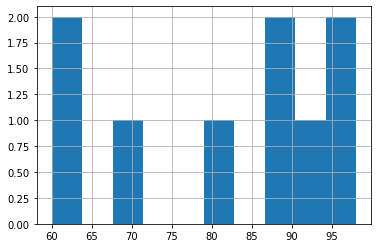

In [13]:
df.marks.hist()

subject
C         90.000000
HTML      98.000000
Java      76.666667
Python    86.333333
Name: marks, dtype: float64


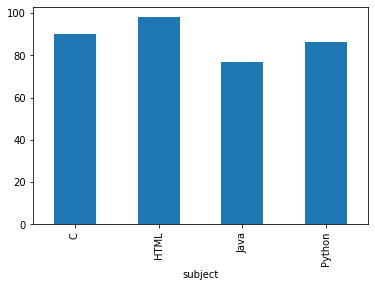

In [17]:
subgroup = df.groupby('subject')['marks'].mean()
print(subgroup)
subgroup.plot(kind='bar')

In [18]:
studgroup = df.groupby('name')['marks'].sum()
studgroup

name
Bill       185.0
Henry       60.0
Roberts    228.0
Steve      264.0
Name: marks, dtype: float64

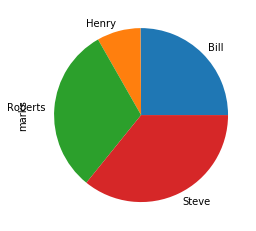

In [19]:
studgroup.plot(kind='pie')